### Major changes in the notebook on date 10th Jan as compared from Yesterday are :-
<br>

<br>
- Changed pre trained weights from Xception to more accurate MobileNetV2
<br> <br>
- Its always great to use pre trained weights rather than using gradient descent for own
<br> <br>
- Loading images in the way as I have done might not be the perfect one but I have learnt this so far and would love to learn new techniques and efficient ways to load, but it worked perfectly fine for me.
<br> <br>
- Reduced batch size from 32 as I was instructed to reduce.
<br> <br>
- Used GPU of Google colab for faster training and processing.
<br> <br>
- More augmentations are now being added for the better Performance of our model.
<br> <br>
- Metrics are now being added as graph plots for the judging processes.
<br> <br>
- The accuracy might not be the best one but surely I will learn more and more under MarketGad and perform better and better for the company.
<br> <br>
- Due to busyness in classes and college work I didn't get much time to optimise.
<br> <br>
- Now wish for an interview call.
<br> <br>

#### Thank you 

In [1]:
# Import 
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('tiny-imagenet-200/'):
    for filename in filenames:
        os.path.join(dirname, filename)



In [2]:
# Import of all libraries needed in the project

from tensorflow import keras
from keras.layers import Input, Dense
from tensorflow.keras.layers import Input, Dense
from keras import applications
from keras.layers import Activation,Add, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D        
from tensorflow.keras.layers import Activation,Add, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D  
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model,Model
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.initializers import *
from keras import regularizers
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\Users\KIIT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KIIT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KIIT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KIIT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [3]:
import cv2
from tqdm import tqdm

train=os.listdir('tiny-imagenet-200/train') # Load Dataset
X_train=[]
y_train=[]
for folderName in train:
    for image_filename in tqdm(os.listdir('tiny-imagenet-200/train/' + folderName +'/'+'images')):
        
                img_file = cv2.imread('tiny-imagenet-200/train/'+ folderName + '/' +'images' + '/'+image_filename)

                img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
                img_arr = np.asarray(img_file)

                
                X_train.append(img_arr)
                y_train.append(folderName)
print(np.array(X_train).shape)
print(np.array(y_train).shape) #printing shape of data

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 983.87it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 841.25it/s]


(100000, 64, 64, 3)
(100000,)


In [4]:

val_dataframe=pd.read_csv('tiny-imagenet-200/val/val_annotations.txt',sep='\t',names=['id','label','d1','d2','d3','d4'])
val_dataframe=val_dataframe.iloc[0:,0:2]
val_dataframe.sort_values(["id"], axis=0, ascending=True, inplace=True)

X_val=[]
y_val=[]
for image_filenames in tqdm(os.listdir("tiny-imagenet-200/val/images")):
    img_file = cv2.imread('tiny-imagenet-200/val/images/' + image_filenames) 
    img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    img_arr = np.asarray(img_file)
    #img_arr=img_arr/255
    X_val.append(img_arr)
    
    for i in range (len(val_dataframe['id'].values)):
        if(image_filenames==val_dataframe['id'].values[i]):
             y_val.append(val_dataframe['label'].values[i])

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:44<00:00, 21.51it/s]


In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


y_train= LabelEncoder().fit_transform(y_train) # transform and fitting data 
y_train_hot=keras.utils.to_categorical(y_train, num_classes=200) # conversion to one hot vector


y_val=LabelEncoder().fit_transform(y_val)
y_val_hot=keras.utils.to_categorical(y_val, num_classes=200)
y_val_hot.shape

(10000, 200)

In [6]:
X_val=np.array(X_val)
X_train=np.array(X_train)
X_train.shape

(100000, 64, 64, 3)

In [7]:
datagen_train = ImageDataGenerator(rescale=1./255,rotation_range=0.2, width_shift_range=0.2, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode='nearest', horizontal_flip=True, interpolation_order=1 )       
train_generator = datagen_train.flow_from_directory('tiny-imagenet-200/train', target_size = (64,64), batch_size= 16, class_mode="categorical")


datagen_val=ImageDataGenerator(rescale=1./255)
val_generator=datagen_val.flow(X_val,y_val_hot,batch_size=16)

Found 100000 images belonging to 200 classes.


In [8]:
img_height,img_width = 64,64 
num_classes = 200

base_model =keras.applications.MobileNetV2(include_top=False, weights='imagenet', classes=200)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\KIIT\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 13s 1us/step


In [9]:
from keras import regularizers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.8)(x)
predictions = Dense(num_classes, activation= 'softmax', kernel_regularizer=regularizers.l2(0.001))(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.summary()

# Model Design and adding layers 
# It was showing error Node has no attribute OrderMask and so I imported the layers from tensorflow.keras rather than kers

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, None, None, 3 128         Conv1[0][0]                 

In [10]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer= SGD(lr=0.001, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

# Compiling Model

In [11]:
model.save_weights("best_model_resnet50v2_2.h5")
checkpoint = ModelCheckpoint("best_model_resnet50v2_2.h5",monitor='val_accuracy',verbose=1,
                              save_best_only=True,mode='max')
callback=[checkpoint] 

In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 90000//100,
                              epochs = 100,
                              validation_data = val_generator,
                              validation_steps = 10000//100,callbacks=callback)
                             

Epoch 1/100
6250/6250 [==============================] - ETA: 0s - loss: 5.6667 - accuracy: 0.0049
Epoch 00001: val_accuracy improved from -inf to 0.00531, saving model to best_model_resnet50v2_2.h5
6250/6250 [==============================] - 81s 90ms/step - loss: 5.6667 - accuracy: 0.0049 - val_loss: 5.6498 - val_accuracy: 0.0053
Epoch 2/100
6250/6250 [==============================] - ETA: 0s - loss: 5.6438 - accuracy: 0.0049
Epoch 00002: val_accuracy did not improve from 0.00531
6250/6250 [==============================] - 80s 88ms/step - loss: 5.6438 - accuracy: 0.0049 - val_loss: 5.6374 - val_accuracy: 0.0044
Epoch 3/100
6250/6250 [==============================] - ETA: 0s - loss: 5.6317 - accuracy: 0.0050
Epoch 00003: val_accuracy improved from 0.00531 to 0.00687, saving model to best_model_resnet50v2_2.h5
6250/6250 [==============================] - 82s 91ms/step - loss: 5.6317 - accuracy: 0.0050 - val_loss: 5.6255 - val_accuracy: 0.0069
Epoch 4/100
6250/6250 [=================

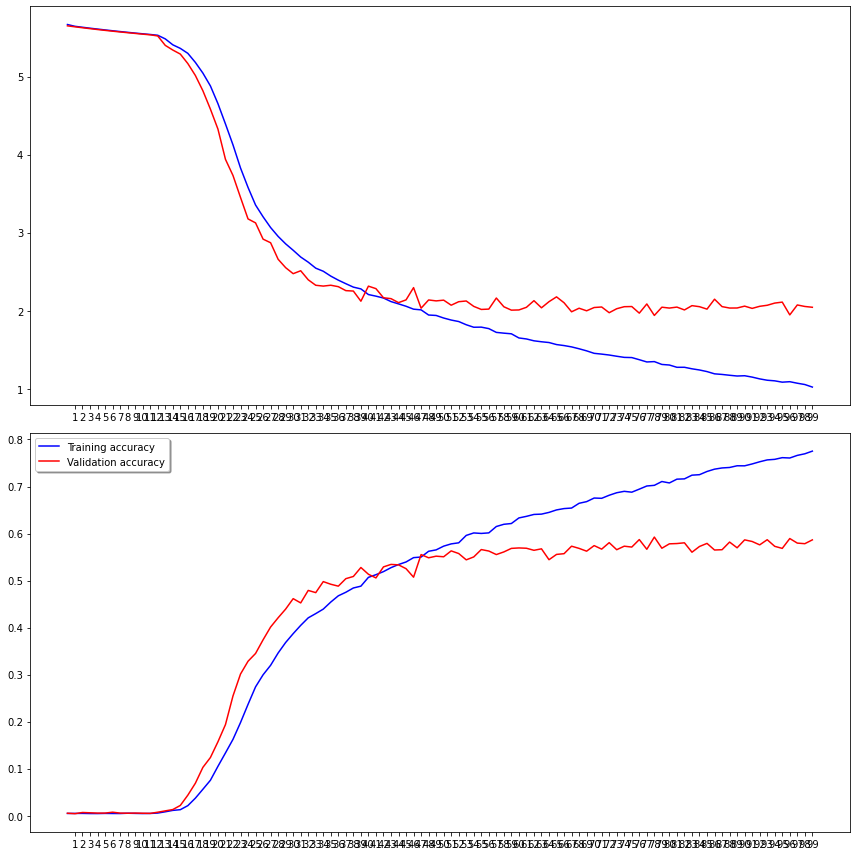

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 100, 1))
#ax1.set_yticks(np.arange(0, 10, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 100, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [14]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

data_test=[]
file=glob('tiny-imagenet-200/test/images/*.JPEG')
for f in file:
    images=load_img(f)
    image_array=img_to_array(images)
    image_array=image_array/255
    data_test.append(image_array)
    images=None
    image_array=None
x_test=np.array(data_test)
x_test.shape

(10000, 64, 64, 3)

In [15]:
prediction = model.predict(x_test)
prediction

array([[6.23296683e-06, 5.53945074e-06, 3.37639858e-06, ...,
        7.39380221e-06, 6.40597682e-06, 1.97901704e-06],
       [6.36660661e-06, 8.59184183e-06, 2.71074600e-06, ...,
        2.37384520e-05, 6.41272391e-06, 5.33845252e-07],
       [9.32272873e-04, 4.85137366e-02, 3.74149904e-02, ...,
        2.65500066e-03, 3.56953824e-04, 2.53208471e-03],
       ...,
       [5.66916970e-05, 1.08847635e-05, 7.58344308e-03, ...,
        3.11599069e-05, 7.23087351e-06, 2.76251612e-05],
       [4.19035525e-04, 9.24301276e-05, 9.95525857e-04, ...,
        9.43362320e-05, 2.04514246e-04, 2.31325001e-04],
       [1.54070967e-05, 1.81157657e-06, 6.52772678e-06, ...,
        1.03819730e-05, 1.59525880e-05, 2.01399962e-05]], dtype=float32)

In [16]:
predicted_class_indices=np.argmax(prediction,axis=1)
predicted_class_indices

array([ 97,  94,  16, ...,  39,   6, 128])

In [17]:
labels = (train_generator.class_indices)
#print(labels.items())
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in predicted_class_indices]
test_filenames = os.listdir("tiny-imagenet-200/test/images")
test_df = pd.DataFrame({'file_name': test_filenames,"category":pred})
test_df.sort_values(["file_name"], axis=0, ascending=True, inplace=True)   



#test_df.to_csv('submission.csv',header=True, index=False)

## Done 
## By Hamdan

# Thank You